### Deepfake more than images 
In this notebook we will look again at videos, and extract their frames. However, on top of the previous obtained data (VINIT DANTKALE (2020), https://www.kaggle.com/datasets/vinitdantkale/deepfake) we will additioanlly include some popular deepfakes from Youtube as well as equivalent real videos. The videos used are the following: 
- Trump and Biden Deepfake: https://youtu.be/cxnsIUDpi-g?si=j3Fy9Hm9DanEySOC
- Trump Deepfake: https://www.youtube.com/watch?v=Ws5O9WASoHg
- Obama Deepfake: https://youtu.be/cQ54GDm1eL0?si=iAg4nR7AxnYESxB_
- Biden real footage: https://www.youtube.com/watch?v=VpNVaHFZnpE
- Trump real footage: https://youtu.be/oOGaXM1awMg?si=71Pr_UT4QzAU38Af
- Obama real footage: https://youtu.be/MS5UjNKw_1M?si=LQpeEKXxsvT4E0-x

They have been prepared and edited with CapCut Dektop app, more details are described in the Report. Essentially, I prepared the data in a way that not falsely any background, subtitles, logos or other faces could be detected, that was essential to get a comparative ground without any face detection applications. 

I learned how to abstract frames from a video here: https://thepythoncode.com/article/extract-frames-from-videos-in-python?utm_content=cmp-true  by Abdou Rockikz. We gonna use the MoviePy Library from Open CV 

In [14]:
!pip install moviepy numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 6.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110721 sha256=48dfe4f5143e58af42f7cad62691b273eec2c27fda20031ed45dc74a0e2f8859
  Stored in directory: /Users/jillcakmak/Library/Caches/pip/wheels/29/15/e4/4f790bec6acd51a00b67e8ee1394f0bc6e0135c315f8ff399a
  Created wheel for imageio_ffmpeg: filename=imageio_ffmpeg-0.4.9-py3-none-any.whl size=16367 sha256=ee4088d4ba8ecd3d631fdaa20058de11ccc71f9c2f2ceb363e2d64ce3246ca89
  Stored in directory: /Users/jillcakmak/Library/Caches/pip/wheels/a0/a2/a5/801b8c9041c8149b486509ade5eb48e3c474d17d31f3746860
Successfully built moviepy imageio_ffmpeg
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1


In [3]:
#First Imports 
from moviepy.editor import VideoFileClip
import numpy as np
import os
from datetime import timedelta

In [4]:
# i.e if video of duration 30 seconds, saves 10 frame per second = 300 frames saved in total
SAVING_FRAMES_PER_SECOND = 10

In [5]:
#Supportive Function 
def format_timedelta(td):
    """Utility function to format timedelta objects in a cool way (e.g 00:00:20.05) 
    omitting microseconds and retaining milliseconds"""
    result = str(td)
    try:
        result, ms = result.split(".")
    except ValueError:
        return (result + ".00").replace(":", "-")
    ms = int(ms)
    ms = round(ms / 1e4)
    return f"{result}.{ms:02}".replace(":", "-")

In [6]:
#Main Function 
def main(video_file):
    # load the video clip
    video_clip = VideoFileClip(video_file)
    # make a folder by the name of the video file
    filename, _ = os.path.splitext(video_file)
    filename += "-moviepy_3"
    if not os.path.isdir(filename):
        os.mkdir(filename)

    # if the SAVING_FRAMES_PER_SECOND is above video FPS, then set it to FPS (as maximum)
    saving_frames_per_second = min(video_clip.fps, SAVING_FRAMES_PER_SECOND)
    # if SAVING_FRAMES_PER_SECOND is set to 0, step is 1/fps, else 1/SAVING_FRAMES_PER_SECOND
    step = 1 / video_clip.fps if saving_frames_per_second == 0 else 1 / saving_frames_per_second
    # iterate over each possible frame
    for current_duration in np.arange(0, video_clip.duration, step):
        # format the file name and save it
        frame_duration_formatted = format_timedelta(timedelta(seconds=current_duration))
        frame_filename = os.path.join(filename, f"frame{frame_duration_formatted}.jpg")
        # save the frame with the current duration
        video_clip.save_frame(frame_filename, current_duration) 

Lets start with real and then do the fake , they will all be names as moviepy_3

In [7]:
if __name__ == "__main__":
    import sys
    video_file = "/Users/jillcakmak/Documents/GitHub/AI_Project/data/Obama_real_new.mp4"
    main(video_file)

In [11]:
if __name__ == "__main__":
    import sys
    video_file = "/Users/jillcakmak/Documents/GitHub/AI_Project/data/realvideo.mp4"
    main(video_file)

In [12]:
if __name__ == "__main__":
    import sys
    video_file = "/Users/jillcakmak/Documents/GitHub/AI_Project/data/REAL_Trump.mp4"
    main(video_file)

In [13]:
if __name__ == "__main__":
    import sys
    video_file = "/Users/jillcakmak/Documents/GitHub/AI_Project/data/Real_Obama_equivalent.mp4"
    main(video_file)

In [14]:
if __name__ == "__main__":
    import sys
    video_file = "/Users/jillcakmak/Documents/GitHub/AI_Project/data/REAL_Biden.mp4"
    main(video_file)

#### Now the fake videos 

In [8]:

if __name__ == "__main__":
    import sys
    video_file = "/Users/jillcakmak/Documents/GitHub/AI_Project/data/FAKE_TrumandBiden.mp4"
    main(video_file)

In [17]:

if __name__ == "__main__":
    import sys
    video_file = "/Users/jillcakmak/Documents/GitHub/AI_Project/data/Fake_Obama.mp4"
    main(video_file)

In [15]:
#additionally i must have missed the tump and biden fake file previously 
if __name__ == "__main__":
    import sys
    video_file = "/Users/jillcakmak/Documents/GitHub/AI_Project/data/Fake_Trump.mp4"
    main(video_file)

In [16]:
if __name__ == "__main__":
    import sys
    video_file = "/Users/jillcakmak/Documents/GitHub/AI_Project/data/fakevideo.mp4"
    main(video_file)

Now lets create another merged folder 

Now before I can proceed I have to merge all my data into only 2 folders (fake and real) as I had previously, instead of 7 different ones. For that I will use 'shutil' I found instructions via Geeks for Geeks where I took the basic code from, you can find it here: https://www.geeksforgeeks.org/how-to-merge-multiple-folders-into-one-folder-using-python/

In [9]:
import shutil 
import os 

In [18]:
# current folder path 
current_folder= os.getcwd()

# list of folders to be merged 
list_dir = ['/Users/jillcakmak/Documents/GitHub/AI_Project/data/FAKE_TrumandBiden-moviepy_3', '/Users/jillcakmak/Documents/GitHub/AI_Project/data/Fake_Trump-moviepy_3', '/Users/jillcakmak/Documents/GitHub/AI_Project/data/fakevideo-moviepy_3','/Users/jillcakmak/Documents/GitHub/AI_Project/data/Fake_Obama-moviepy_3']  

# enumerate on list_dir to get the 
# content of all the folders ans store it in a dictionary 
content_list = {} 
for index, val in enumerate(list_dir): 
	path = os.path.join(current_folder, val) 
	content_list[ list_dir[index] ] = os.listdir(path)


In [19]:
# Function to create new folder if not exists 
def make_new_folder(folder_name, parent_folder_path): 
	
	# Path 
	path = os.path.join(parent_folder_path, folder_name) 
	
	# Create the folder 
	# 'new_folder' in 
	# parent_folder 
	try: 
		
		# mode of the folder 
		mode = 0o777

		# Create folder 
		os.mkdir(path, mode) 
		
	except OSError as error: 
		print(error) 

# folder in which all the content 
# will be merged 
merge_folder = "fake_data_second_merge_folder"

# merge_folder path - current_folder 
# + merge_folder 
merge_folder_path = os.path.join(current_folder, merge_folder) 

# create merge_folder if not exists 
make_new_folder(merge_folder, current_folder)


In [20]:
#I an encountered an error because the frames were saved with the same titles via moviepy, so I have to rename them 

# loop through the list of folders
for sub_dir in content_list:

    # loop through the contents of the
    # list of folders
    for contents in content_list[sub_dir]:

        # make the path of the content to move
        path_to_content = sub_dir + "/" + contents

        # make the path with the current folder
        dir_to_move = os.path.join(current_folder, path_to_content)

        # Check if the file already exists in the merge_folder
        if os.path.exists(os.path.join(merge_folder_path, contents)):
            #This solution is from chat_gpt as I couldn't find another way of how to rename my frames saved by moviepy 
            # Split the filename and extension
            base, extension = os.path.splitext(contents)
            index = 1
            # Keep trying new names until a unique name is found
            while True:
                new_name = f"{base}_{index}{extension}"
                new_path = os.path.join(merge_folder_path, new_name)
                if not os.path.exists(new_path):
                    break
                index += 1
            print(f"File {contents} already exists in {merge_folder_path}. Renaming to {new_name}")
            # Move the file with the new name
            shutil.move(dir_to_move, new_path)
        else:
            # Move the file
            shutil.move(dir_to_move, merge_folder_path)


File frame0-00-05.90.jpg already exists in /Users/jillcakmak/Documents/GitHub/AI_Project/fake_data_second_merge_folder. Renaming to frame0-00-05.90_1.jpg
File frame0-00-02.70.jpg already exists in /Users/jillcakmak/Documents/GitHub/AI_Project/fake_data_second_merge_folder. Renaming to frame0-00-02.70_1.jpg
File frame0-00-06.00.jpg already exists in /Users/jillcakmak/Documents/GitHub/AI_Project/fake_data_second_merge_folder. Renaming to frame0-00-06.00_1.jpg
File frame0-00-03.30.jpg already exists in /Users/jillcakmak/Documents/GitHub/AI_Project/fake_data_second_merge_folder. Renaming to frame0-00-03.30_1.jpg
File frame0-00-00.60.jpg already exists in /Users/jillcakmak/Documents/GitHub/AI_Project/fake_data_second_merge_folder. Renaming to frame0-00-00.60_1.jpg
File frame0-00-04.10.jpg already exists in /Users/jillcakmak/Documents/GitHub/AI_Project/fake_data_second_merge_folder. Renaming to frame0-00-04.10_1.jpg
File frame0-00-01.20.jpg already exists in /Users/jillcakmak/Documents/GitHu

In [ ]:
#It worked with the Chat_GPT solution, as it skipped over the frame names which where already given and tried to rename it to something unqique,
# I was reading more about that suggested piece of code here: 

#Lets to the same again for the real videos 


#### Merge real videos 

In [21]:
# current folder path 
current_folder= os.getcwd()

# list of folders to be merged 
list_dir = ['/Users/jillcakmak/Documents/GitHub/AI_Project/data/Obama_real_new-moviepy_3', '/Users/jillcakmak/Documents/GitHub/AI_Project/data/REAL_Biden-moviepy_3', '/Users/jillcakmak/Documents/GitHub/AI_Project/data/Real_Obama_equivalent-moviepy_3','/Users/jillcakmak/Documents/GitHub/AI_Project/data/REAL_Trump-moviepy_3', '/Users/jillcakmak/Documents/GitHub/AI_Project/data/realvideo-moviepy_3']  

# enumerate on list_dir to get the 
# content of all the folders ans store it in a dictionary 
content_list = {} 
for index, val in enumerate(list_dir): 
	path = os.path.join(current_folder, val) 
	content_list[ list_dir[index] ] = os.listdir(path)

In [22]:
# Function to create new folder if not exists 
def make_new_folder(folder_name, parent_folder_path): 
	
	# Path 
	path = os.path.join(parent_folder_path, folder_name) 
	
	# Create the folder 
	# 'new_folder' in 
	# parent_folder 
	try: 
		
		# mode of the folder 
		mode = 0o777

		# Create folder 
		os.mkdir(path, mode) 
		
	except OSError as error: 
		print(error) 

# folder in which all the content 
# will be merged 
merge_folder = "real_data_second_merge_folder"

# merge_folder path - current_folder 
# + merge_folder 
merge_folder_path = os.path.join(current_folder, merge_folder) 

# create merge_folder if not exists 
make_new_folder(merge_folder, current_folder)


In [23]:
#I an encountered an error because the frames were saved with the same titles via moviepy, so I have to rename them 

# loop through the list of folders
for sub_dir in content_list:

    # loop through the contents of the
    # list of folders
    for contents in content_list[sub_dir]:

        # make the path of the content to move
        path_to_content = sub_dir + "/" + contents

        # make the path with the current folder
        dir_to_move = os.path.join(current_folder, path_to_content)

        # Check if the file already exists in the merge_folder
        if os.path.exists(os.path.join(merge_folder_path, contents)):
            #This solution is from chat_gpt as I couldn't find another way of how to rename my frames saved by moviepy 
            # Split the filename and extension
            base, extension = os.path.splitext(contents)
            index = 1
            # Keep trying new names until a unique name is found
            while True:
                new_name = f"{base}_{index}{extension}"
                new_path = os.path.join(merge_folder_path, new_name)
                if not os.path.exists(new_path):
                    break
                index += 1
            print(f"File {contents} already exists in {merge_folder_path}. Renaming to {new_name}")
            # Move the file with the new name
            shutil.move(dir_to_move, new_path)
        else:
            # Move the file
            shutil.move(dir_to_move, merge_folder_path)


File frame0-00-15.80.jpg already exists in /Users/jillcakmak/Documents/GitHub/AI_Project/real_data_second_merge_folder. Renaming to frame0-00-15.80_1.jpg
File frame0-00-33.90.jpg already exists in /Users/jillcakmak/Documents/GitHub/AI_Project/real_data_second_merge_folder. Renaming to frame0-00-33.90_1.jpg
File frame0-00-42.90.jpg already exists in /Users/jillcakmak/Documents/GitHub/AI_Project/real_data_second_merge_folder. Renaming to frame0-00-42.90_1.jpg
File frame0-00-19.80.jpg already exists in /Users/jillcakmak/Documents/GitHub/AI_Project/real_data_second_merge_folder. Renaming to frame0-00-19.80_1.jpg
File frame0-00-07.80.jpg already exists in /Users/jillcakmak/Documents/GitHub/AI_Project/real_data_second_merge_folder. Renaming to frame0-00-07.80_1.jpg
File frame0-00-21.90.jpg already exists in /Users/jillcakmak/Documents/GitHub/AI_Project/real_data_second_merge_folder. Renaming to frame0-00-21.90_1.jpg
File frame0-00-09.90.jpg already exists in /Users/jillcakmak/Documents/GitHu

Now that we have 2 directories with fake and real images of the video we can built a simple Classifier as we learned in class. I put the newly merged files manually into a new folder csalled Second_Merge_Folder. ALl previous directories I manually cleaned and placed them into another folder called "Exctracted_Frame_Directories"  

In [24]:
#Imports first 
import torch
import torchvision
import cv2
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision.utils as vutils
import torchvision.transforms as transforms
import argparse

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from imutils import paths
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from sklearn.utils import resample
from sklearn.metrics import classification_report

In [25]:
#I moved the frames of the video snippets into a new folder 'Video_data'
device = 'mps'
momentum = 0.9
num_epochs = 20
num_classes = 2 #fake & real 
val_size = 0.3
batch_size = 100
learn_rate = 0.001
freeze_lower_layers = True
data_path = "/Users/jillcakmak/Documents/GitHub/AI_Project/data/Second_Merge_Folder"

In [26]:
#next we define training and validation 
train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomAffine(degrees=(-30,30),translate=(0.15,0.15),scale=(0.85,1.15)),
        transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
        transforms.RandomResizedCrop(size=(224, 224), antialias=True),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [27]:
val_transform = transforms.Compose(
    [   
        torchvision.transforms.Resize(224, antialias=True),
        torchvision.transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [28]:
#Lets split our data by train, test and validation 
dataset = ImageFolder(data_path, transform=train_transform)
num_classes = 2 #len(dataset.classes)

# Get length of dataset and indicies
num_train = len(dataset)
indices = list(range(num_train))

# Get train / val split for data points
train_indices, test_indices = train_test_split(indices, test_size=val_size, random_state=42)
train_indices, val_indices = train_test_split(train_indices, test_size=val_size, random_state=42)

# Override dataset classes to only be samples for each split
train_subset = torch.utils.data.Subset(dataset, train_indices)
test_subset = torch.utils.data.Subset(dataset, test_indices)
val_subset = torch.utils.data.Subset(dataset, val_indices)

# Create data loaders
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

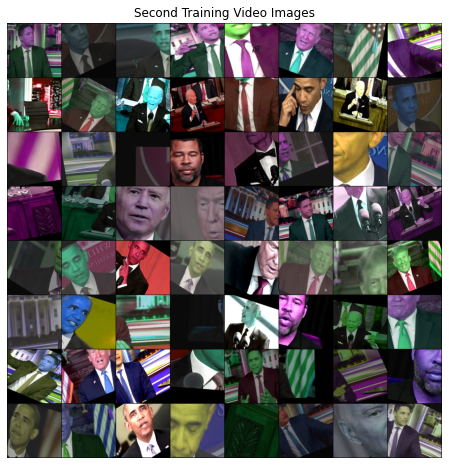

In [29]:
#Now we visualise our training dataset, which should only be images of the Trevor Noah /Barack Obama Deepfake 
# Plot some training images
real_batch = next(iter(train_loader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Second Training Video Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

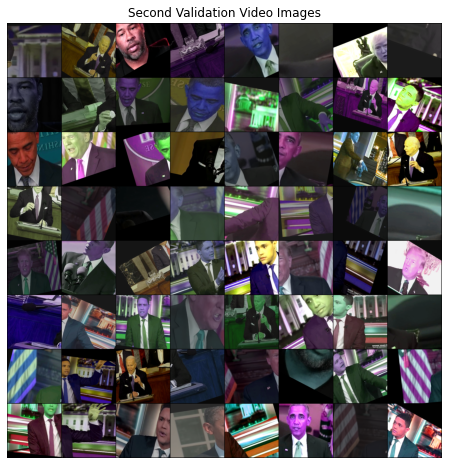

In [30]:
# Plot some validation images
real_batch = next(iter(val_loader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Second Validation Video Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [31]:
#Now we will use the pretrained model from week 3 
model = torchvision.models.resnet18(weights='IMAGENET1K_V1')

# Freeze weights
if freeze_lower_layers == True:
    for param in model.parameters():
        param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)
model.to(device)

#this code was originally sources from: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html as described in class

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [32]:
# Cross entropy loss for training classification
criterion = nn.CrossEntropyLoss()

# Stochastic gradient descent loss
optimizer = optim.SGD(model.parameters(), lr=learn_rate, momentum=momentum)

In [33]:
#Now we will train and calculate Validation loss. As we learned ideally we should stop the model when the validation loss goes up and training goes down 
train_losses = []
val_losses = []

best_loss = 100000
for epoch in range(num_epochs): 
    train_loss = 0.0
    
    # Training loop
    for i, data in enumerate(train_loader, 0):
        # Get data
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Process data
        outputs = model(inputs)
        
        # Calculate loss
        loss = criterion(outputs, labels)
        
        # Update model weights
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_loss += loss.item()
    
    # Validation loop
    with torch.no_grad():
        val_loss = 0.0
        for i, data in enumerate(val_loader, 0):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    # Normalise cumulative losses to dataset size
    train_loss = train_loss / len(train_loader)
    val_loss = val_loss / len(val_loader)
    
    # Added cumulative losses to lists for later display
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    print(f'Epoch {epoch + 1}, train loss: {train_loss:.3f}, val loss: {val_loss:.3f}')
    
    # if validation score is lowest so far, save the model, ideal model 
    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model.state_dict(), 'best_finetuned_increased_video_second_model.pt')

Epoch 1, train loss: 0.618, val loss: 0.586
Epoch 2, train loss: 0.559, val loss: 0.546
Epoch 3, train loss: 0.528, val loss: 0.518
Epoch 4, train loss: 0.509, val loss: 0.506
Epoch 5, train loss: 0.489, val loss: 0.490
Epoch 6, train loss: 0.485, val loss: 0.473
Epoch 7, train loss: 0.458, val loss: 0.468
Epoch 8, train loss: 0.460, val loss: 0.472
Epoch 9, train loss: 0.447, val loss: 0.465
Epoch 10, train loss: 0.427, val loss: 0.465
Epoch 11, train loss: 0.458, val loss: 0.452
Epoch 12, train loss: 0.450, val loss: 0.433
Epoch 13, train loss: 0.423, val loss: 0.441
Epoch 14, train loss: 0.419, val loss: 0.475
Epoch 15, train loss: 0.443, val loss: 0.430
Epoch 16, train loss: 0.428, val loss: 0.441
Epoch 17, train loss: 0.417, val loss: 0.467
Epoch 18, train loss: 0.475, val loss: 0.416
Epoch 19, train loss: 0.414, val loss: 0.422
Epoch 20, train loss: 0.423, val loss: 0.426


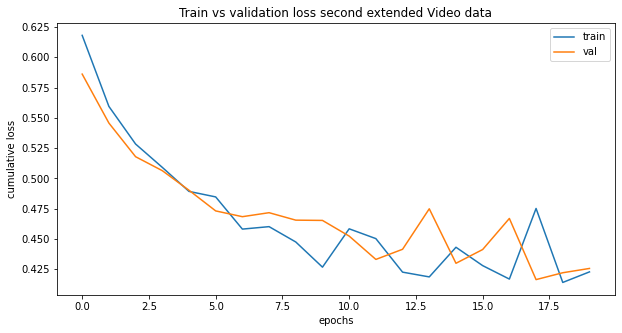

In [34]:
#Now we will plot the outcome (Training and Validation)
#Plotting Training and Validation loss 
plt.figure(figsize=(10,5))
plt.title("Train vs validation loss second extended Video data")
plt.plot(train_losses,label="train")
plt.plot(val_losses,label="val")
plt.xlabel("epochs")
plt.ylabel("cumulative loss")
plt.legend()
plt.show()

In [35]:
    # Training loop from above but altered to test 
total= 0
correct = 0

for i, data in enumerate(test_loader, 0):
        # Get data
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Process data
        outputs = model(inputs)

        # Compute predictions #this part is from chat-gpt 
        _, predicted = torch.max(outputs.data, 1)

         # Calculate accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [36]:
# Print the accuracy
print('Accuracy of the network , debugged on the extended video test images: %d %%' % (100 * correct / total))

Accuracy of the network , debugged on the extended video test images: 78 %


# The accuracy is 78% of my extended Video Data 
### This is a much more reasonable comparison to the 60% accuracy with less data and 20 Epochs then it was previously with the bugs in my data and 92% accuracy 
#### The model performs better with more data which is realitvely equivalent in video types 
When I edited the videos I was careful to cut out all labels and text as this could be an indication for the Neural Network of what is real and fake. This may explain the increased accuracy of the previous part2_moredata notebook where I had an error with the data upload. 
After reading into the topic it became clear that we do not exactly know how the system classifies if it is a real or fake images, does it remember the background? Does it do it by light? Pixel quality? Zoom? There are many parameters to explore. Additionally this dataset might have perfomed better than the image dataset due to the nature of the real and fake videos, I tried to find real equivalents of the politicions, with as little people in the background as possible, as that might be another factor that can be an indication for the system. 
Overall, this is a good outcome compared to the previous models. In the future I could analyse deepfake videos not only by imagery but also by audio, additionally face detections of mouth detections might be useful as many videos are real and only the mouth movements are edited (unless it is a complete deep fake, then there are more challenges)

Looking back at the project I can see why the industry struggles to define deepfake correctly. When you do not exactly know how our systems learn how do you want to define and let them learn what deepfake is? Small edits in an image might be fine tuning for us (such as photo editing, portrait mode etc.) but the system could already flag it as potential fake if you train the model only on edits. It is clear that there is yet more to come and I cant wait to see what strategies can be implemented to successfully flag especially political deep fakes which previously did have a major impact on votings and misinformation 